In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler , StandardScaler , QuantileTransformer
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *
# Ignore all warnings
warnings.simplefilter("ignore")

In [40]:
 #Load dataset
train_df=pd.read_csv('/kaggle/input/playground-series-s4e6/train.csv')
test_df=pd.read_csv('/kaggle/input/playground-series-s4e6/test.csv')
submission=pd.read_csv("/kaggle/input/playground-series-s4e6/sample_submission.csv")

In [3]:
train_df.head()
train_df.shape

(76518, 38)

In [4]:
# mapping it 
target_map={
'Graduate':0,
'Enrolled':1,
'Dropout':2
}

y=np.array(train_df['Target'])
y_train_df=[target_map[f] for f in y]

In [5]:
train_df.columns


Index(['id', 'Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units

In [6]:
# Identify the target variable and features
target = 'Target'  # Replace 'Target' with the actual name of your target column
X = train_df.drop(columns=[target, 'id'])
y = train_df[target]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)
print(X_test.shape)
print(X_train.shape)

(15304, 36)
(61214, 36)


In [7]:
import pandas as pd

# Assuming train_df is already loaded in your environment

# Initialize lists to hold column names by data type
string_columns = []
float_columns = []
int_columns = []

# Iterate over columns and check their data types
for col in X_train.columns:
    if pd.api.types.is_string_dtype(X_train[col]):
        string_columns.append(col)
    elif pd.api.types.is_float_dtype(X_train[col]):
        float_columns.append(col)
    elif pd.api.types.is_integer_dtype(X_train[col]):
        int_columns.append(col)

# Print the columns by data type
print("String columns:", string_columns)
print("Float columns:", float_columns)
print("Integer columns:", int_columns)


String columns: []
Float columns: ['Previous qualification (grade)', 'Admission grade', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)', 'Unemployment rate', 'Inflation rate', 'GDP']
Integer columns: ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd

In [8]:
# Get the unique values in each column
unique_values = {col: X_train[col].unique() for col in X_train.columns}

# Print the unique values for each column
for col, values in unique_values.items():
    print(f"Column: {col}")
    print(values)
    print(f"Number of unique values: {len(values)}")
    print("\n")


Column: Marital status
[1 2 4 6 5 3]
Number of unique values: 6


Column: Application mode
[ 1  7 18 17 44 39 43 51  5 42 15 53 16 10  2  3 35  4  9 26 12]
Number of unique values: 21


Column: Application order
[1 4 6 2 3 5 0]
Number of unique values: 7


Column: Course
[9500 9773 9085 9238 9147 9130 9853 9003 9991 9254 9670 9070 9119  171
 9556 8014   33  979   39]
Number of unique values: 19


Column: Daytime/evening attendance
[1 0]
Number of unique values: 2


Column: Previous qualification
[ 1  3 39  9 19 12 42 40 10  6  2 43 38 14  4 15 37  5 11 36]
Number of unique values: 20


Column: Previous qualification (grade)
[118.  150.  130.  125.  135.  131.  120.  163.  116.  100.  108.  133.1
 110.  132.  128.  137.  122.  138.  143.  126.  127.  134.  141.  140.
 160.  123.  139.  136.  102.  111.  158.  112.  129.  157.  142.  146.
 124.  117.  121.  115.  145.  147.  151.  162.  133.  149.  144.  119.
 148.  165.  153.  101.  113.  170.  106.  172.  156.  168.  159.  161.
 167.  

In [9]:
# Assuming X_train is already defined and contains your training data

# Identify integer columns
integer_cols = X_train.select_dtypes(include=['int']).columns.tolist()
# Print the list of integer columns\
integer_cols = X_test.select_dtypes(include=['int']).columns.tolist()
# Print the list of integer columns
print("Integer columns:")
print(integer_cols)


Integer columns:
['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (without evaluations)']


In [10]:
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
encoder = LabelEncoder()


for col in integer_cols:
    unique_values_train = X_train[col].unique()
    if len(unique_values_train) <= 15:
        X_train[col] = encoder.fit_transform(X_train[col])
      
    else:
        print(f"Skipping {col} in X_train due to more than 15 unique values: {len(unique_values_train)}")


Skipping Application mode in X_train due to more than 15 unique values: 21
Skipping Course in X_train due to more than 15 unique values: 19
Skipping Previous qualification in X_train due to more than 15 unique values: 20
Skipping Nacionality in X_train due to more than 15 unique values: 17
Skipping Mother's qualification in X_train due to more than 15 unique values: 34
Skipping Father's qualification in X_train due to more than 15 unique values: 37
Skipping Mother's occupation in X_train due to more than 15 unique values: 38
Skipping Father's occupation in X_train due to more than 15 unique values: 53
Skipping Age at enrollment in X_train due to more than 15 unique values: 46
Skipping Curricular units 1st sem (credited) in X_train due to more than 15 unique values: 21
Skipping Curricular units 1st sem (enrolled) in X_train due to more than 15 unique values: 23
Skipping Curricular units 1st sem (evaluations) in X_train due to more than 15 unique values: 36
Skipping Curricular units 1st 

In [11]:
# Print the list of integer columns\
integer_cols = X_test.select_dtypes(include=['int']).columns.tolist()
# Print the list of integer columns
print("Integer columns:")
print(integer_cols)


Integer columns:
['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (without evaluations)']


In [12]:
# Get the unique values in each column
unique_values = {col: X_test[col].unique() for col in X_test.columns}

# Print the unique values for each column
for col, values in unique_values.items():
    print(f"Column: {col}")
    print(values)
    print(f"Number of unique values: {len(values)}")
    print("\n")


Column: Marital status
[1 4 2 5 6 3]
Number of unique values: 6


Column: Application mode
[ 1 51 18 17 39 16 44 15  7 43 53  5 42 10 27  2]
Number of unique values: 16


Column: Application order
[3 1 4 5 2 6 0 9]
Number of unique values: 8


Column: Course
[9773 9853 9254 9070 9119 9670 9147 9238 8014 9500 9130 9003  171 9085
 9991 9556   33]
Number of unique values: 17


Column: Daytime/evening attendance
[1 0]
Number of unique values: 2


Column: Previous qualification
[ 1 39  3 40 19 42  9 12  6 43 11  2  4 10 38 17 15 14 37  5]
Number of unique values: 20


Column: Previous qualification (grade)
[133.  130.  122.  128.  125.  121.  136.  134.  120.  131.  140.  144.
 126.  146.  132.  145.  137.  143.  127.  160.  133.1 167.  139.  135.
 123.  141.  149.  161.  129.  150.  138.  151.  124.  110.  148.  111.
 113.  118.  164.  106.  162.  112.  116.  142.  100.  115.  117.  154.
 152.  153.  157.  165.  172.  119.  147.  114.  170.  124.4 156.   99.
 174.  102.  155.  140.8 158.  

In [13]:
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
encoder = LabelEncoder()


for col in integer_cols:
    unique_values_test = X_test[col].unique()
    if len(unique_values_test) <= 15:
        X_test[col] = encoder.fit_transform(X_test[col])
      
    else:
        print(f"Skipping {col} in X_train due to more than 15 unique values: {len(unique_values_test)}")

Skipping Application mode in X_train due to more than 15 unique values: 16
Skipping Course in X_train due to more than 15 unique values: 17
Skipping Previous qualification in X_train due to more than 15 unique values: 20
Skipping Mother's qualification in X_train due to more than 15 unique values: 27
Skipping Father's qualification in X_train due to more than 15 unique values: 30
Skipping Mother's occupation in X_train due to more than 15 unique values: 31
Skipping Father's occupation in X_train due to more than 15 unique values: 42
Skipping Age at enrollment in X_train due to more than 15 unique values: 43
Skipping Curricular units 1st sem (credited) in X_train due to more than 15 unique values: 21
Skipping Curricular units 1st sem (enrolled) in X_train due to more than 15 unique values: 23
Skipping Curricular units 1st sem (evaluations) in X_train due to more than 15 unique values: 32
Skipping Curricular units 1st sem (approved) in X_train due to more than 15 unique values: 22
Skippi

In [14]:
y_train.shape


(61214,)

In [15]:
# Check for NaN values in X_train
nan_values_train = X_train.isnull().sum()

print("NaN values in X_train:")
print(nan_values_train[nan_values_train > 0])  # Print only columns with NaN values

# Check for NaN values in X_test
nan_values_test = X_test.isnull().sum()

print("\nNaN values in X_test:")
print(nan_values_test[nan_values_test > 0])  # Print only columns with NaN values


NaN values in X_train:
Series([], dtype: int64)

NaN values in X_test:
Series([], dtype: int64)


In [16]:
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
encoder = LabelEncoder()

# Lists to keep track of columns with ≤ 15 unique values
cols_with_less_or_equal_15_unique_values_train = []
cols_with_less_or_equal_15_unique_values_test = []

# Iterate over integer columns in X_train
for col in integer_cols:
    unique_values_train = X_train[col].unique()
    if len(unique_values_train) <= 15:
        #X_train[col] = encoder.fit_transform(X_train[col])
        cols_with_less_or_equal_15_unique_values_train.append(col)
    else:
        print(f"Skipping '{col}' in X_train due to more than 15 unique values: {len(unique_values_train)}")

# Print columns with ≤ 15 unique values in X_train
print("Columns with 15 or fewer unique values in X_train:")
for col in cols_with_less_or_equal_15_unique_values_train:
    print(f"{col}: {len(X_train[col].unique())} unique values")

# Iterate over integer columns in X_test
for col in integer_cols:
    unique_values_test = X_test[col].unique()
    if len(unique_values_test) <= 15:
        #X_test[col] = encoder.fit_transform(X_test[col])
        cols_with_less_or_equal_15_unique_values_test.append(col)
    else:
        print(f"Skipping '{col}' in X_test due to more than 15 unique values: {len(unique_values_test)}")

# Print columns with ≤ 15 unique values in X_test
print("\nColumns with 15 or fewer unique values in X_test:")
for col in cols_with_less_or_equal_15_unique_values_test:
    print(f"{col}: {len(X_test[col].unique())} unique values")


Skipping 'Application mode' in X_train due to more than 15 unique values: 21
Skipping 'Course' in X_train due to more than 15 unique values: 19
Skipping 'Previous qualification' in X_train due to more than 15 unique values: 20
Skipping 'Nacionality' in X_train due to more than 15 unique values: 17
Skipping 'Mother's qualification' in X_train due to more than 15 unique values: 34
Skipping 'Father's qualification' in X_train due to more than 15 unique values: 37
Skipping 'Mother's occupation' in X_train due to more than 15 unique values: 38
Skipping 'Father's occupation' in X_train due to more than 15 unique values: 53
Skipping 'Age at enrollment' in X_train due to more than 15 unique values: 46
Skipping 'Curricular units 1st sem (credited)' in X_train due to more than 15 unique values: 21
Skipping 'Curricular units 1st sem (enrolled)' in X_train due to more than 15 unique values: 23
Skipping 'Curricular units 1st sem (evaluations)' in X_train due to more than 15 unique values: 36
Skippi

In [17]:
y_train.unique()
y_test.unique()

array(['Graduate', 'Dropout', 'Enrolled'], dtype=object)

In [18]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Instantiate LabelEncoder
encoder = LabelEncoder()

# Lists to keep track of columns with ≤ 15 unique values
cols_with_less_or_equal_15_unique_values_train = []
cols_with_less_or_equal_15_unique_values_test = []

# Create copies of the original data to preserve them
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

# Iterate over integer columns in X_train
for col in integer_cols:
    unique_values_train = X_train[col].unique()
    if len(unique_values_train) <= 15:
        X_train_encoded[col] = encoder.fit_transform(X_train[col])
        cols_with_less_or_equal_15_unique_values_train.append(col)
    else:
        print(f"Skipping '{col}' in X_train due to more than 15 unique values: {len(unique_values_train)}")

# Print columns with ≤ 15 unique values in X_train
print("Columns with 15 or fewer unique values in X_train:")
for col in cols_with_less_or_equal_15_unique_values_train:
    print(f"{col}: {len(X_train[col].unique())} unique values")

# Iterate over integer columns in X_test
for col in integer_cols:
    unique_values_test = X_test[col].unique()
    if len(unique_values_test) <= 15:
        X_test_encoded[col] = encoder.fit_transform(X_test[col])
        cols_with_less_or_equal_15_unique_values_test.append(col)
    else:
        print(f"Skipping '{col}' in X_test due to more than 15 unique values: {len(unique_values_test)}")

# Print columns with ≤ 15 unique values in X_test
print("\nColumns with 15 or fewer unique values in X_test:")
for col in cols_with_less_or_equal_15_unique_values_test:
    print(f"{col}: {len(X_test[col].unique())} unique values")

# Display a sample of the transformed data
print("\nSample of the transformed X_train:")
print(X_train_encoded[cols_with_less_or_equal_15_unique_values_train].head())

print("\nSample of the transformed X_test:")
print(X_test_encoded[cols_with_less_or_equal_15_unique_values_test].head())


Skipping 'Application mode' in X_train due to more than 15 unique values: 21
Skipping 'Course' in X_train due to more than 15 unique values: 19
Skipping 'Previous qualification' in X_train due to more than 15 unique values: 20
Skipping 'Nacionality' in X_train due to more than 15 unique values: 17
Skipping 'Mother's qualification' in X_train due to more than 15 unique values: 34
Skipping 'Father's qualification' in X_train due to more than 15 unique values: 37
Skipping 'Mother's occupation' in X_train due to more than 15 unique values: 38
Skipping 'Father's occupation' in X_train due to more than 15 unique values: 53
Skipping 'Age at enrollment' in X_train due to more than 15 unique values: 46
Skipping 'Curricular units 1st sem (credited)' in X_train due to more than 15 unique values: 21
Skipping 'Curricular units 1st sem (enrolled)' in X_train due to more than 15 unique values: 23
Skipping 'Curricular units 1st sem (evaluations)' in X_train due to more than 15 unique values: 36
Skippi

In [19]:
from sklearn.preprocessing import LabelEncoder


# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform y
y_train_encoded = label_encoder.fit_transform(y_train)




In [20]:
# Assuming X_train is your DataFrame
n_unique_nationalities = X_train['Nacionality'].nunique()
print(f"Number of unique nationalities in 'Nacionality' column: {n_unique_nationalities}")


Number of unique nationalities in 'Nacionality' column: 17


In [21]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Fit and transform y
y_test_encoded = label_encoder.fit_transform(y_test)



In [22]:
import pandas as pd

# Assuming train_df is already loaded
train_df = pd.read_csv('/kaggle/input/playground-series-s4e6/train.csv')

# Define the target variable
target_variable = 'Target'  # Replace with your actual target variable column name

# Assuming your target variable has three categories: 'Graduate', 'Dropout', 'Enrolled'
target_categories = ['Graduate', 'Dropout', 'Enrolled']

# Iterate over each column in train_df (excluding the target variable)
for column in train_df.columns:
    if column != target_variable:
        # Create a crosstab to examine relationship with each target category
        cross_tab = pd.crosstab(train_df[column], train_df[target_variable], normalize='index')
        print(f"Cross-tabulation between {column} and {target_variable}:\n")
        print(cross_tab)
        print("\n")


Cross-tabulation between id and Target:

Target  Dropout  Enrolled  Graduate
id                                 
0           0.0       0.0       1.0
1           1.0       0.0       0.0
2           1.0       0.0       0.0
3           0.0       1.0       0.0
4           0.0       0.0       1.0
...         ...       ...       ...
76513       0.0       0.0       1.0
76514       0.0       0.0       1.0
76515       0.0       1.0       0.0
76516       1.0       0.0       0.0
76517       0.0       0.0       1.0

[76518 rows x 3 columns]


Cross-tabulation between Marital status and Target:

Target           Dropout  Enrolled  Graduate
Marital status                              
1               0.309536  0.199974  0.490490
2               0.560423  0.138784  0.300793
3               0.437500  0.125000  0.437500
4               0.587760  0.169746  0.242494
5               0.543103  0.112069  0.344828
6               0.657143  0.200000  0.142857


Cross-tabulation between Application mode and Ta

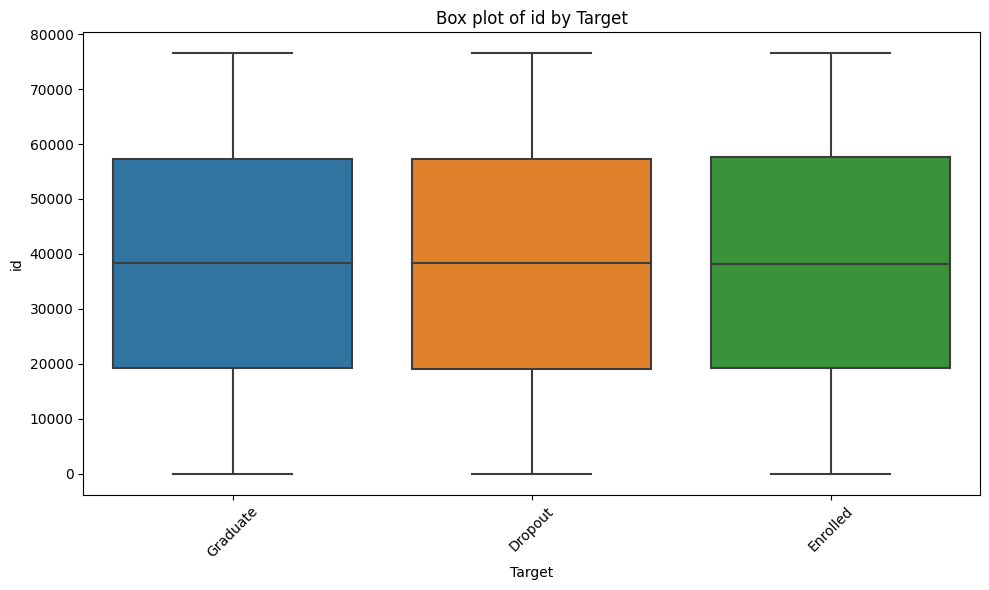

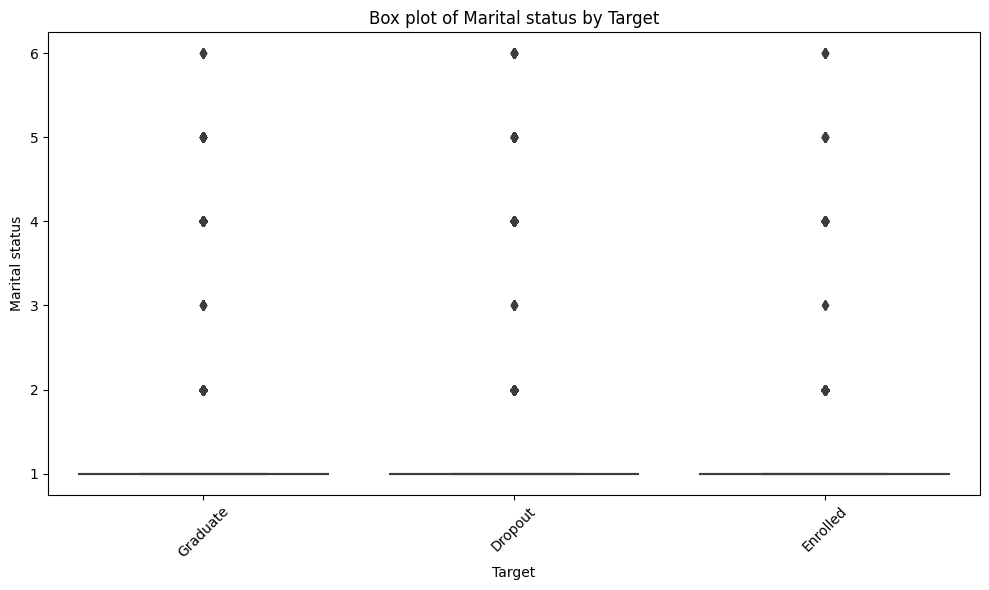

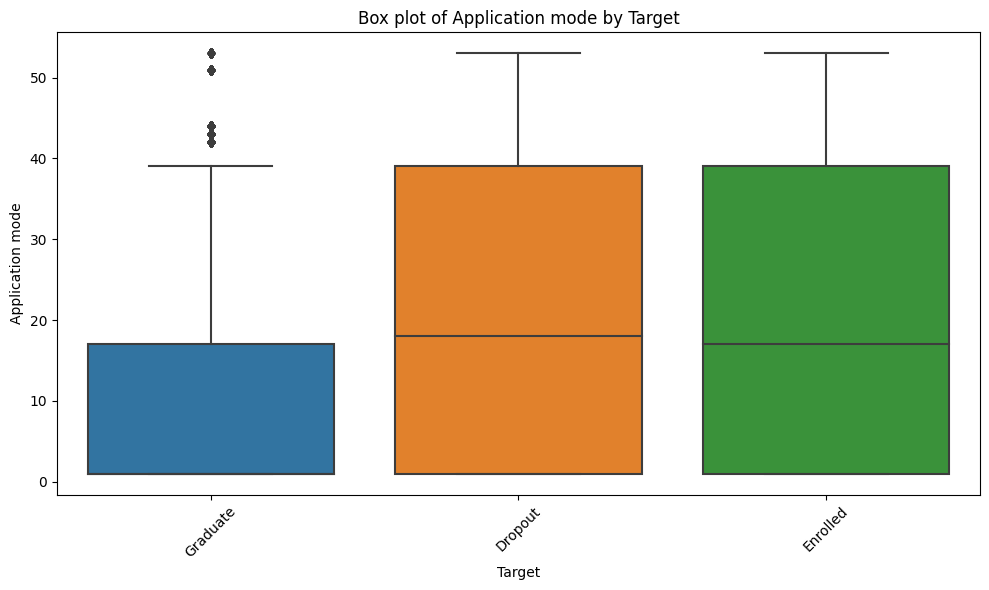

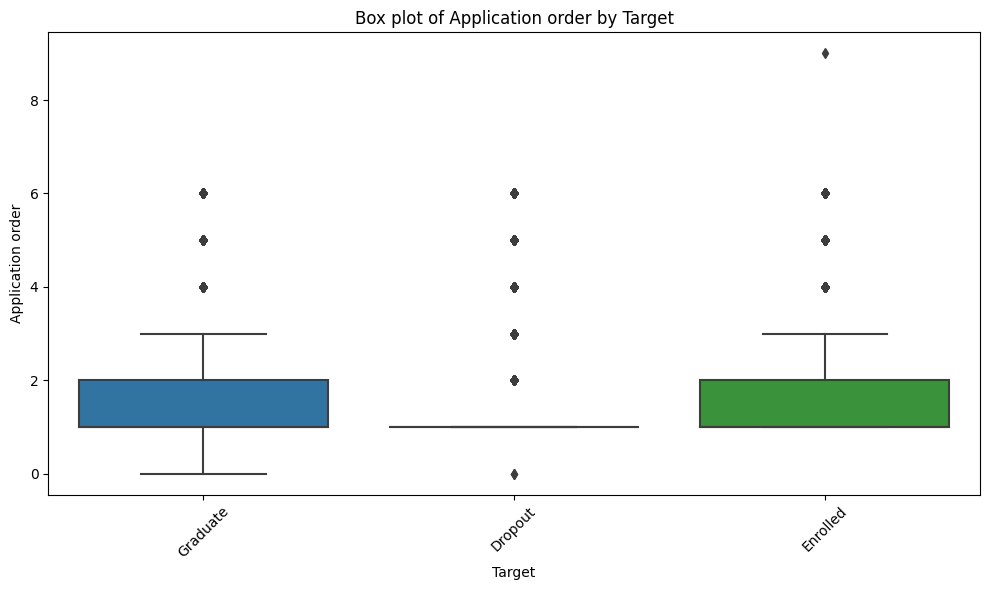

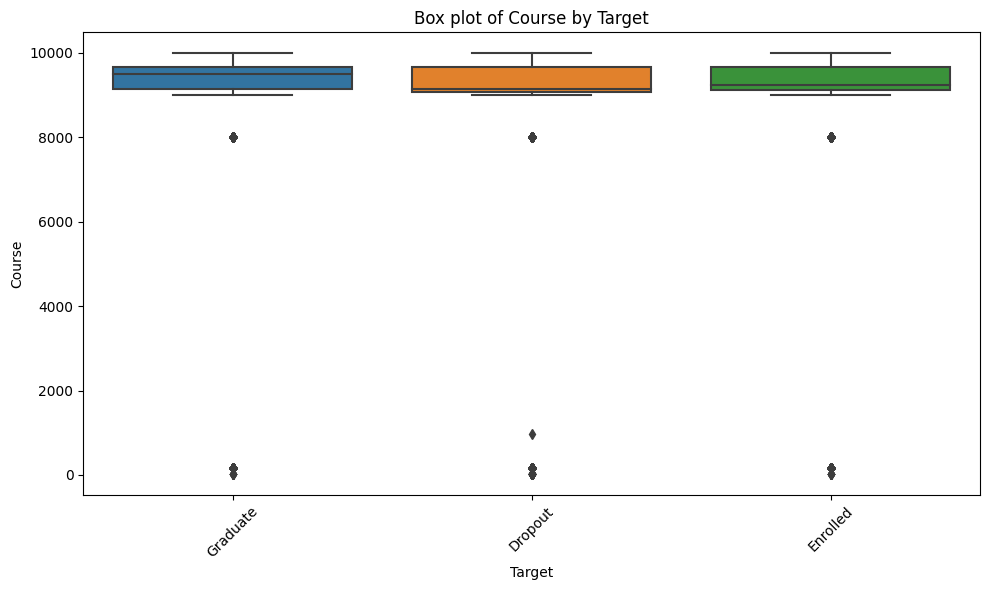

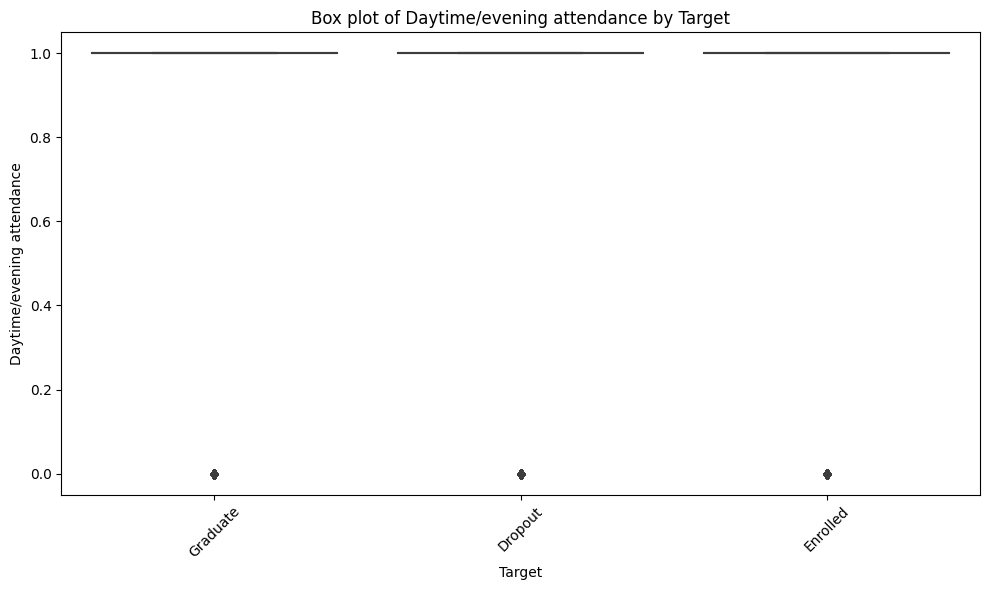

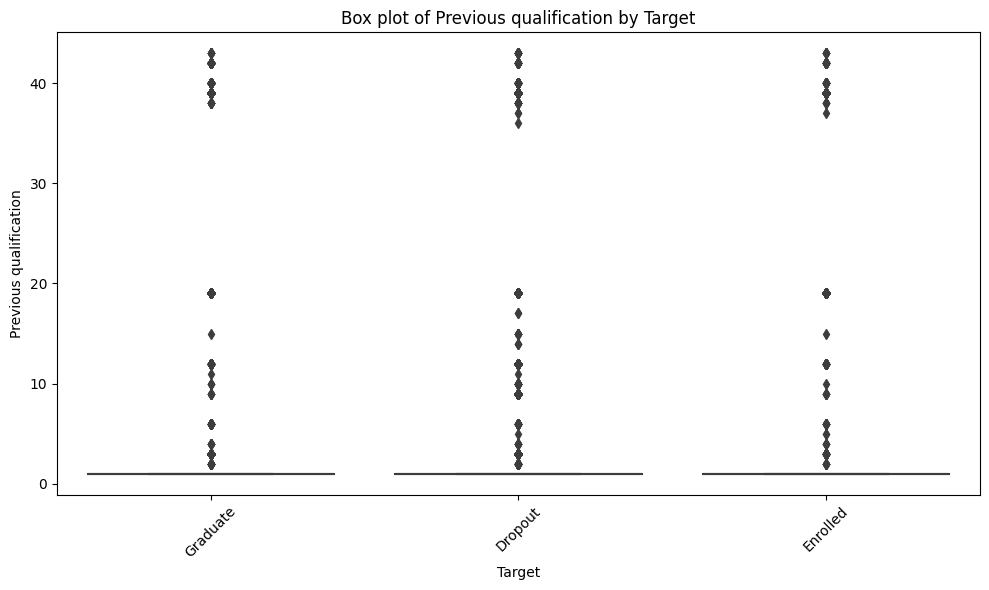

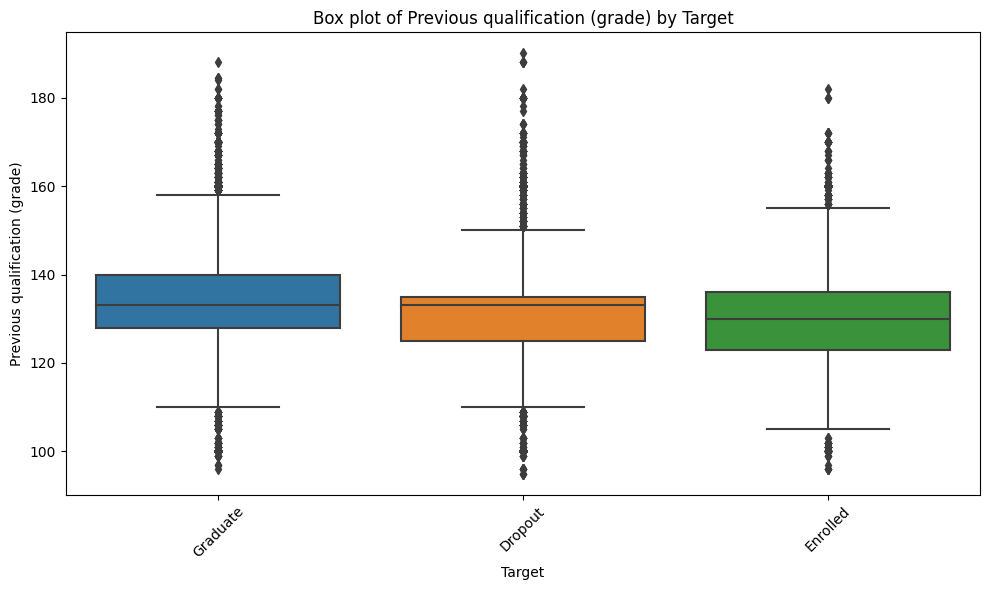

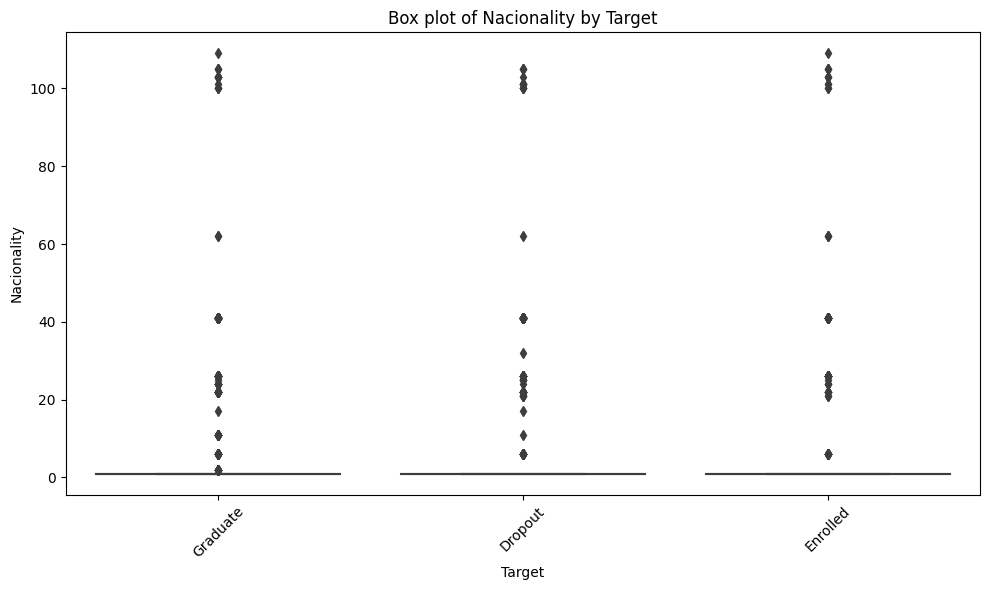

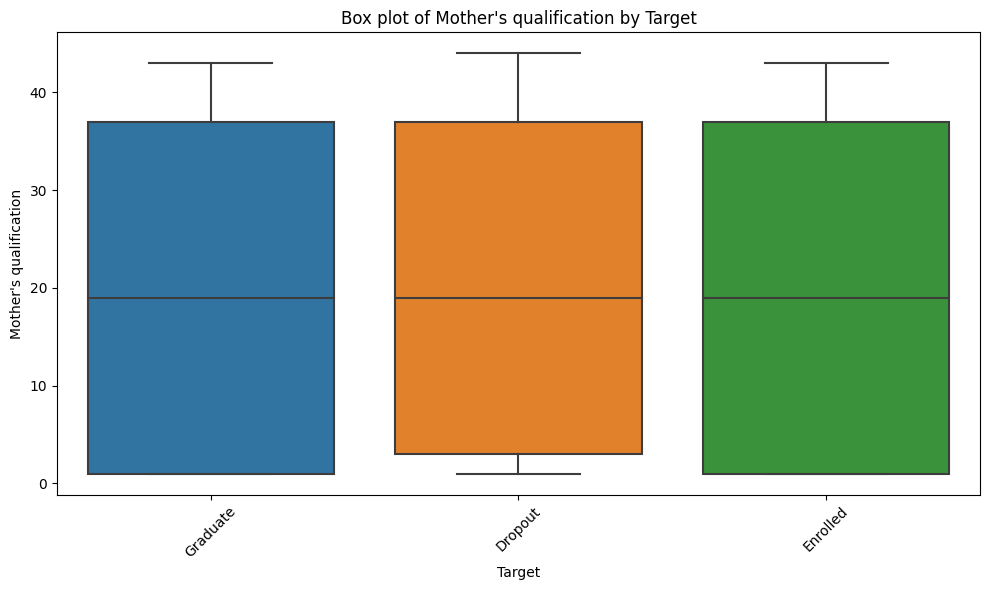

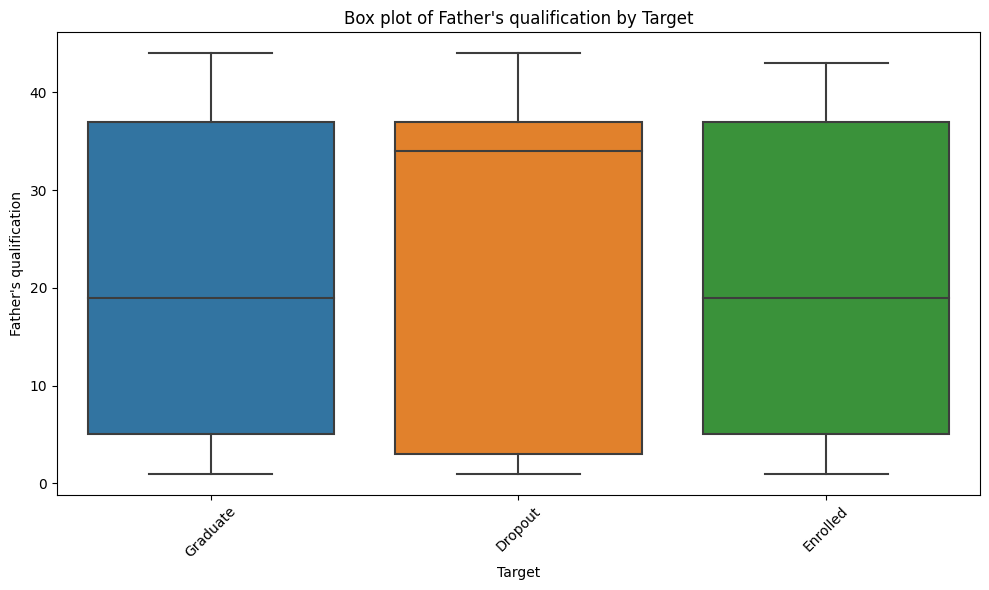

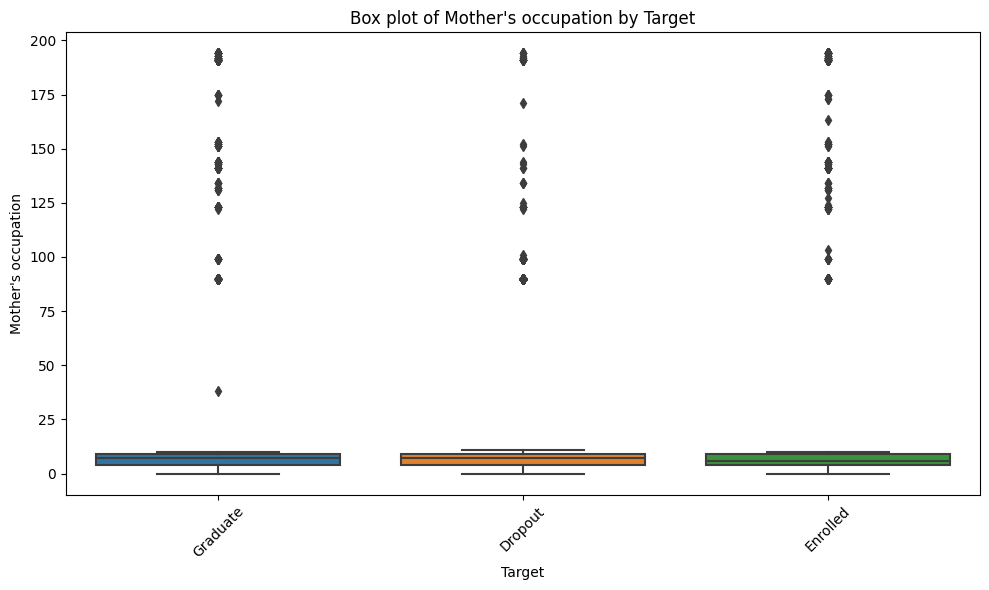

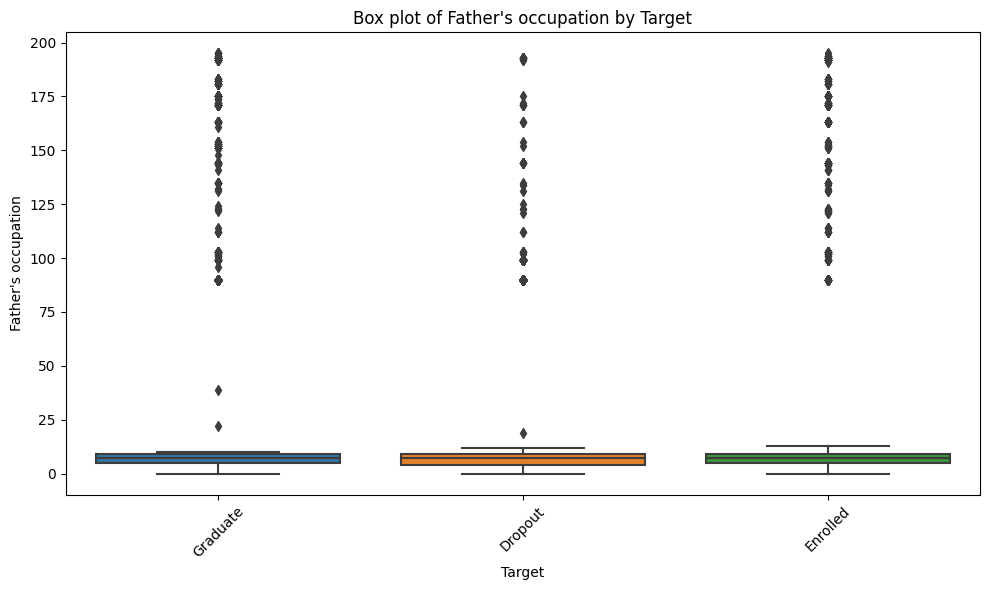

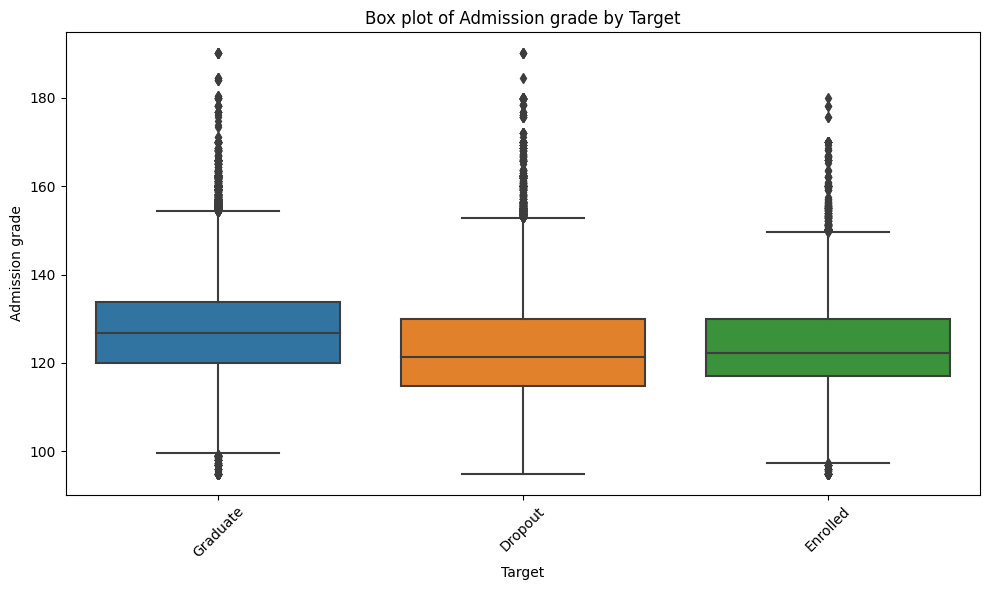

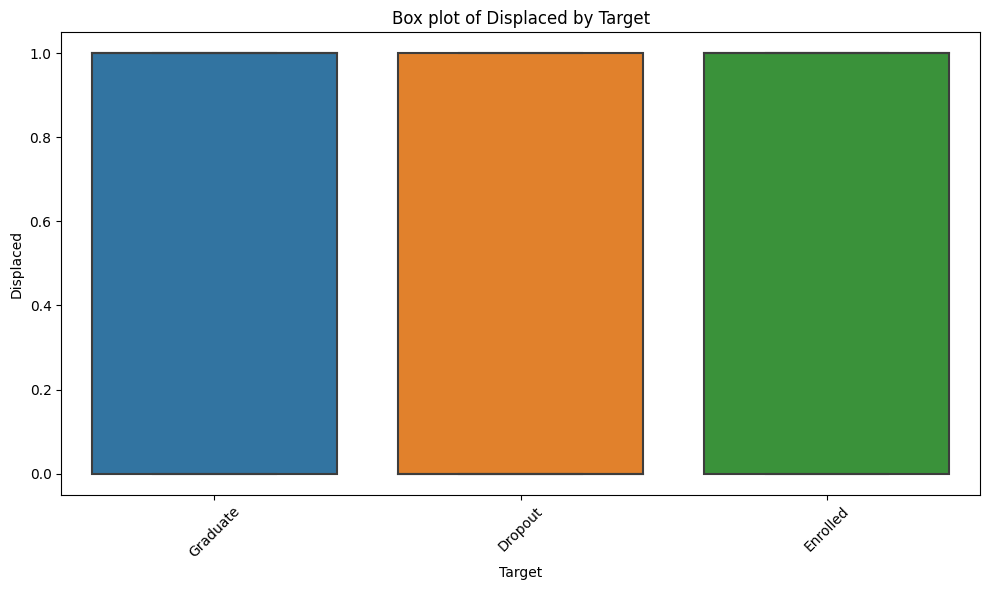

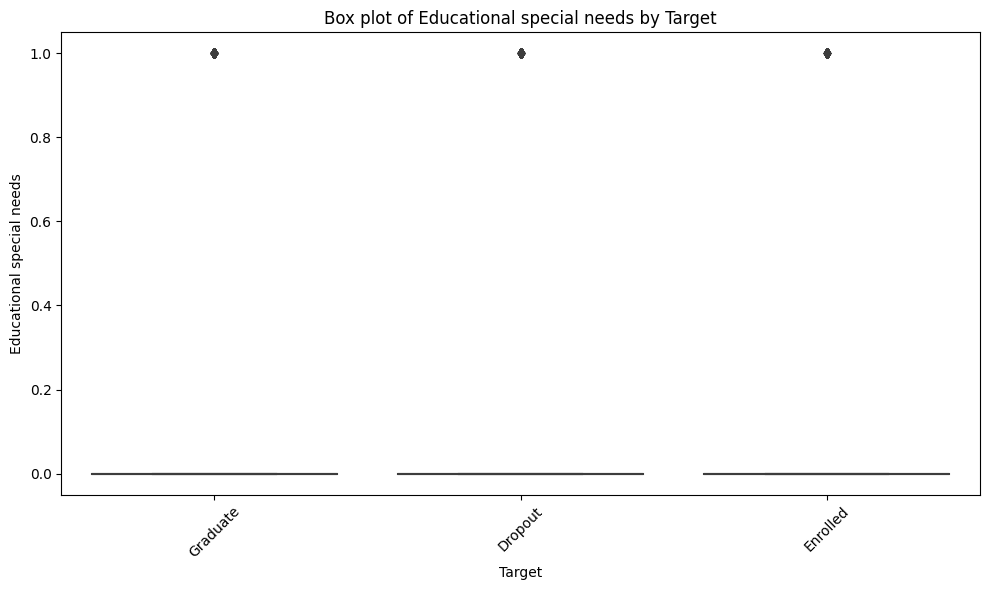

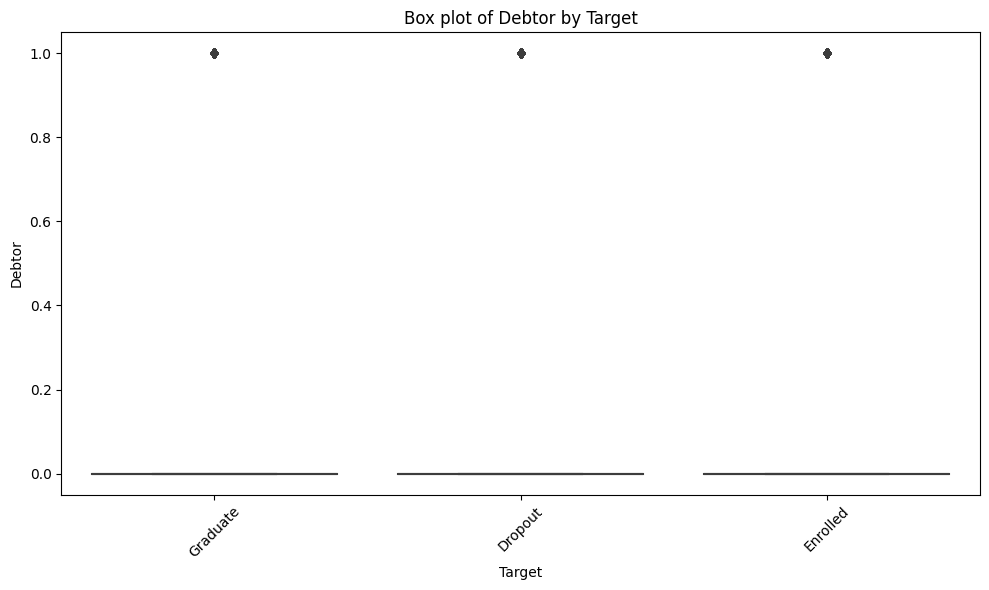

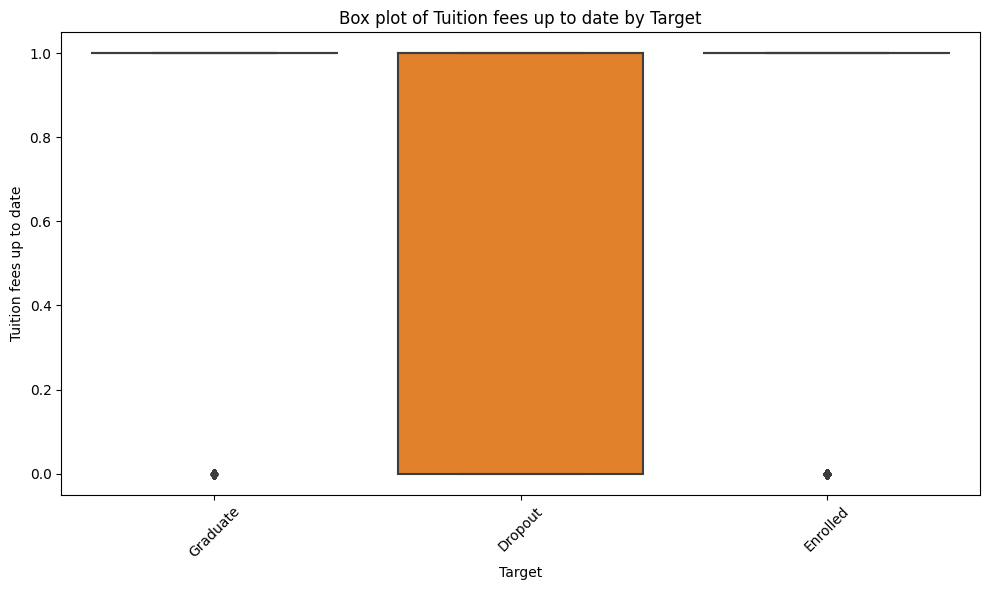

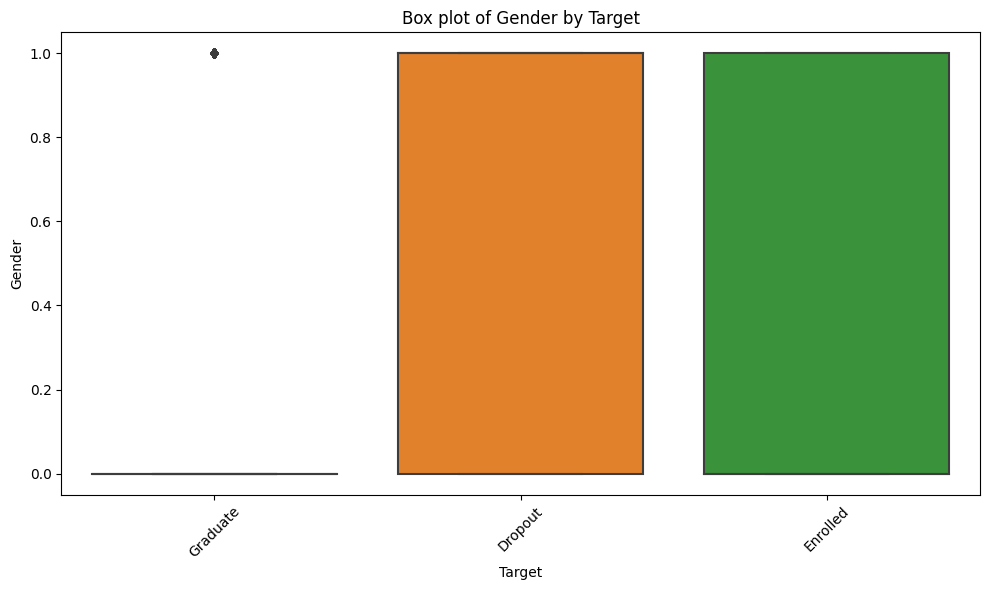

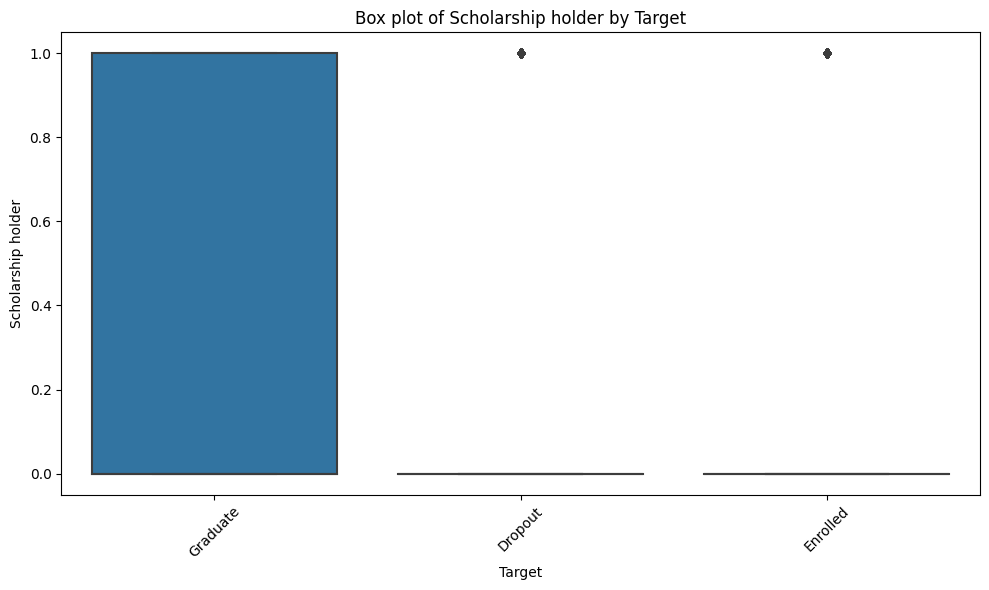

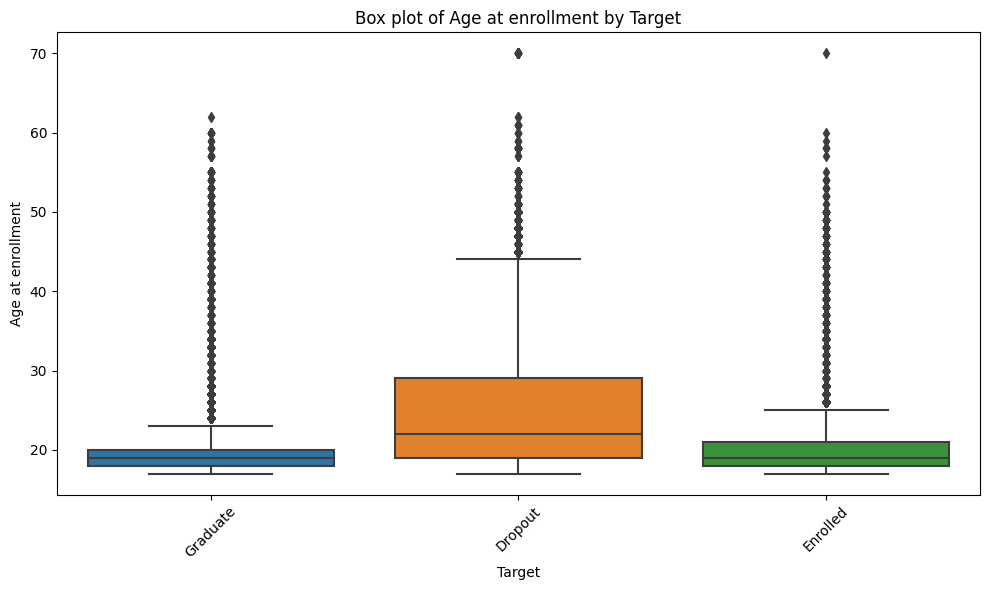

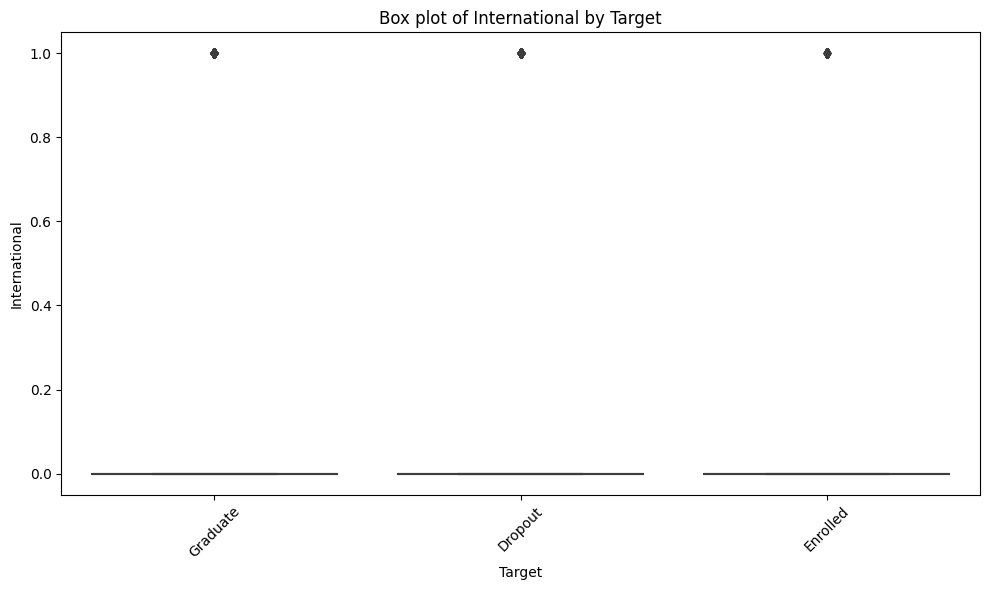

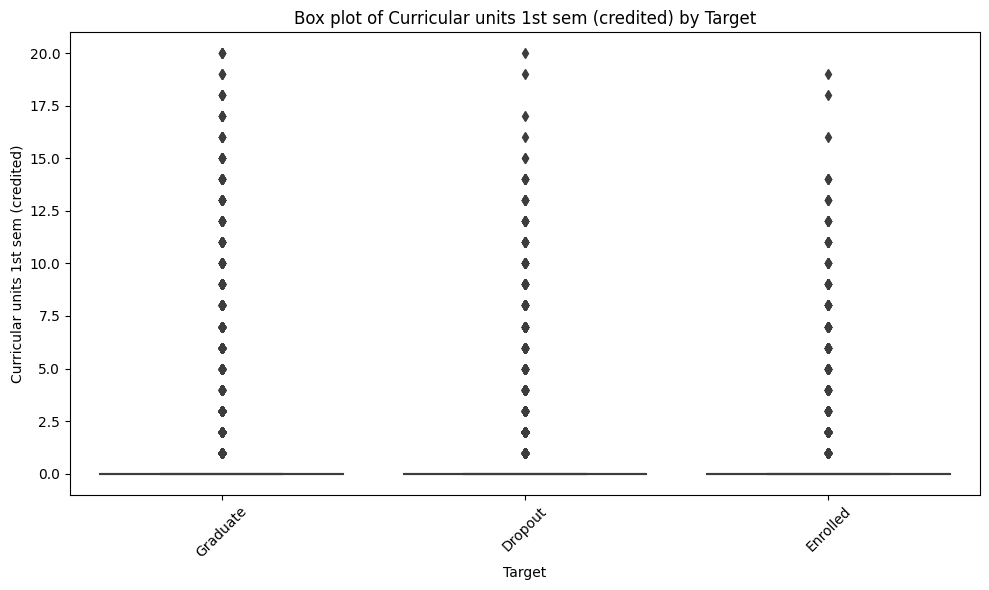

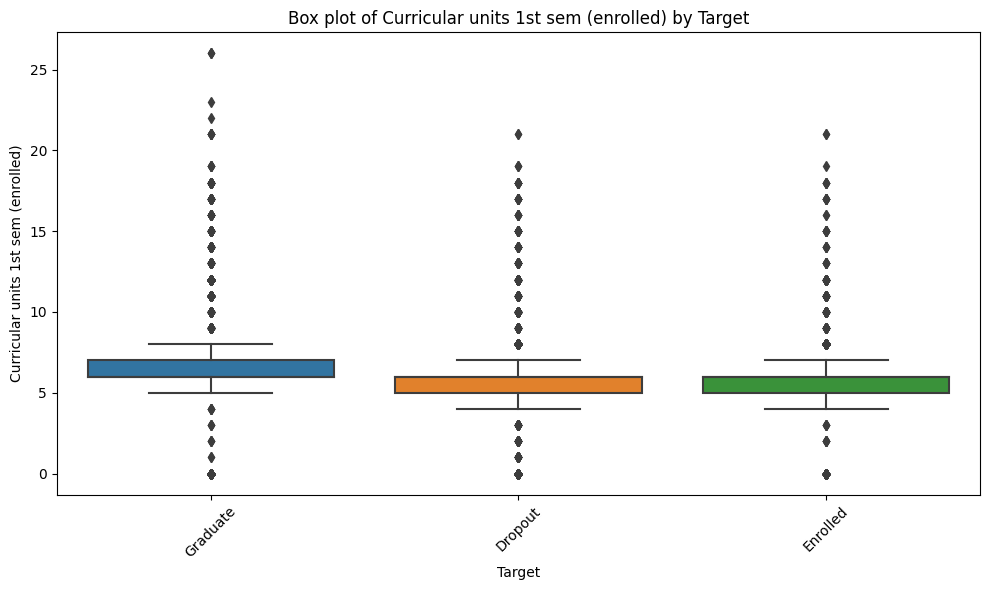

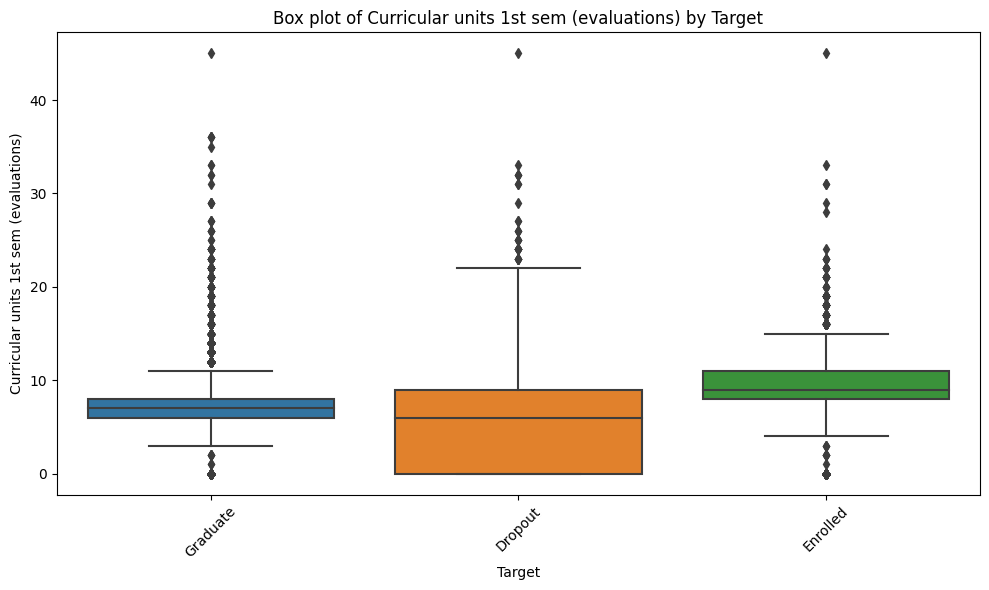

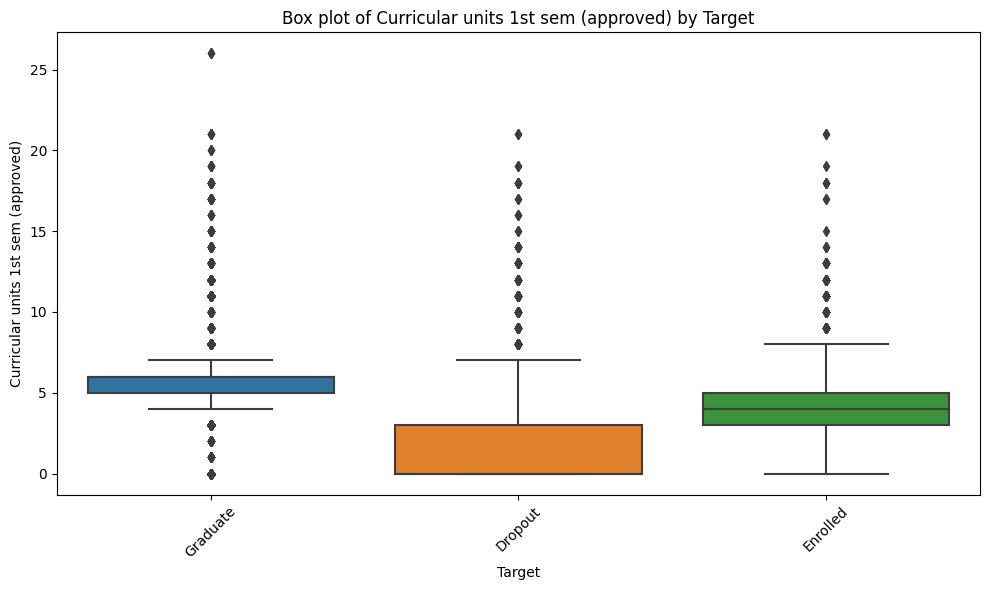

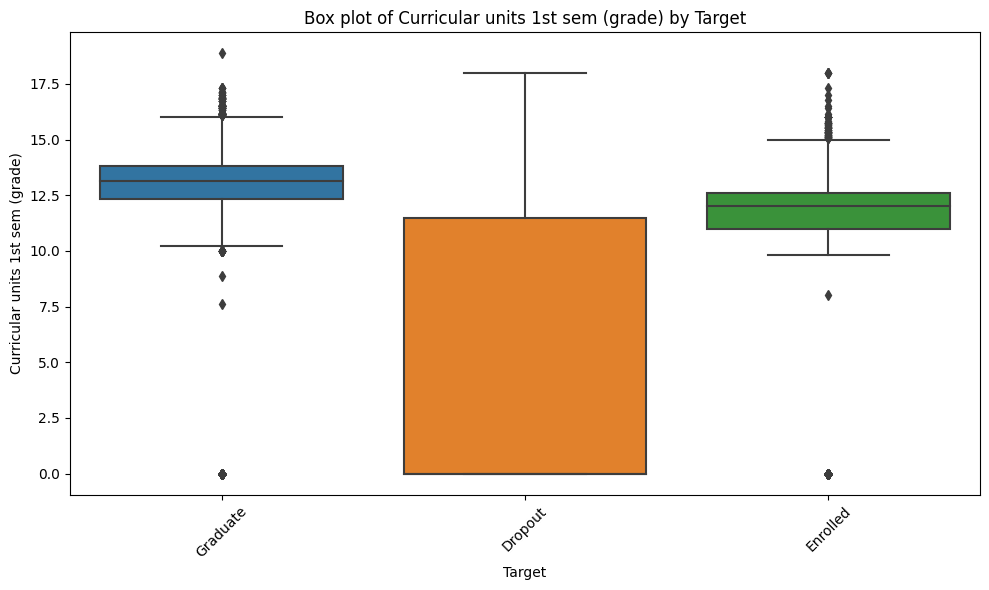

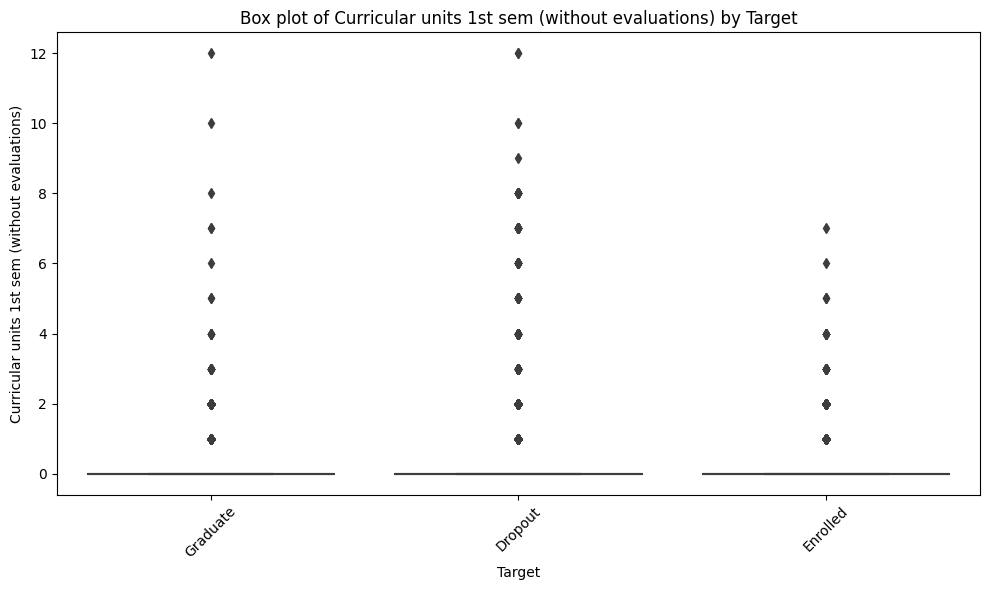

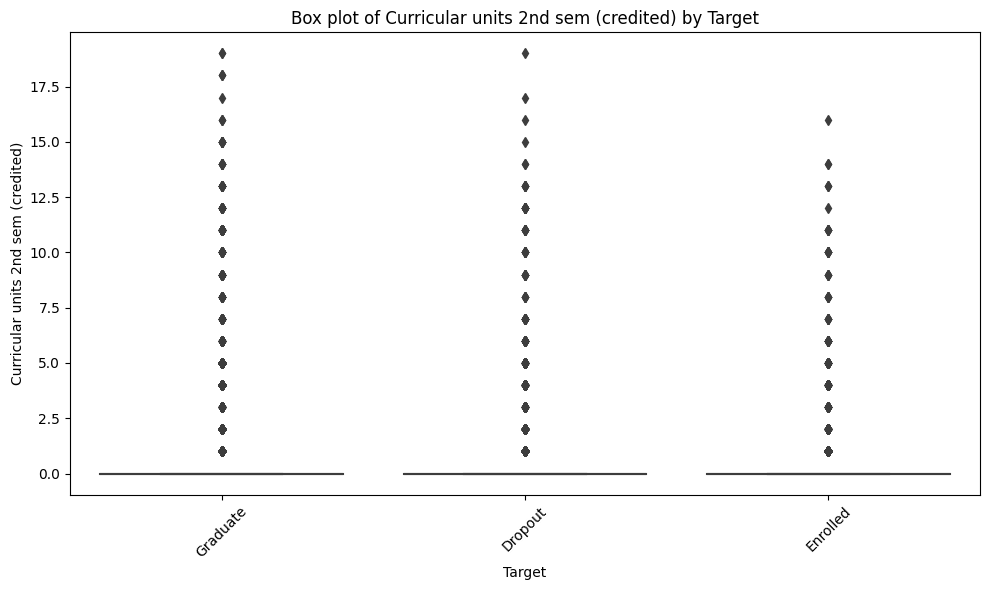

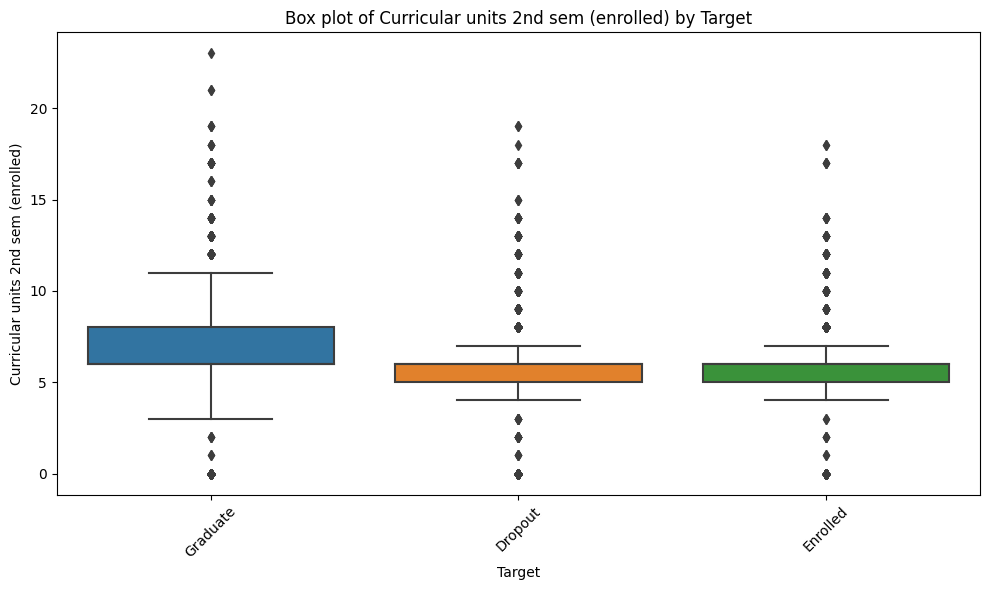

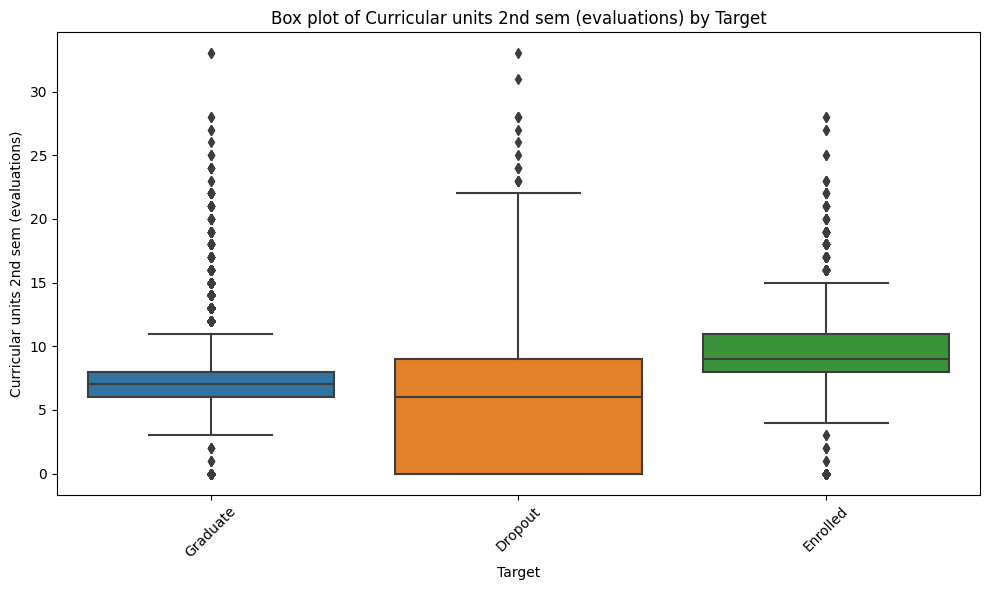

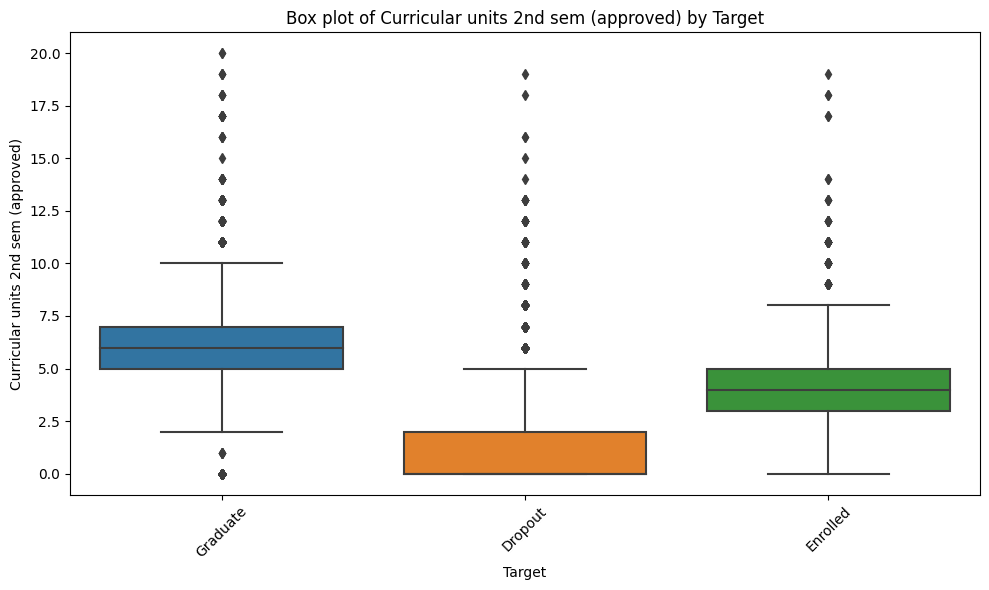

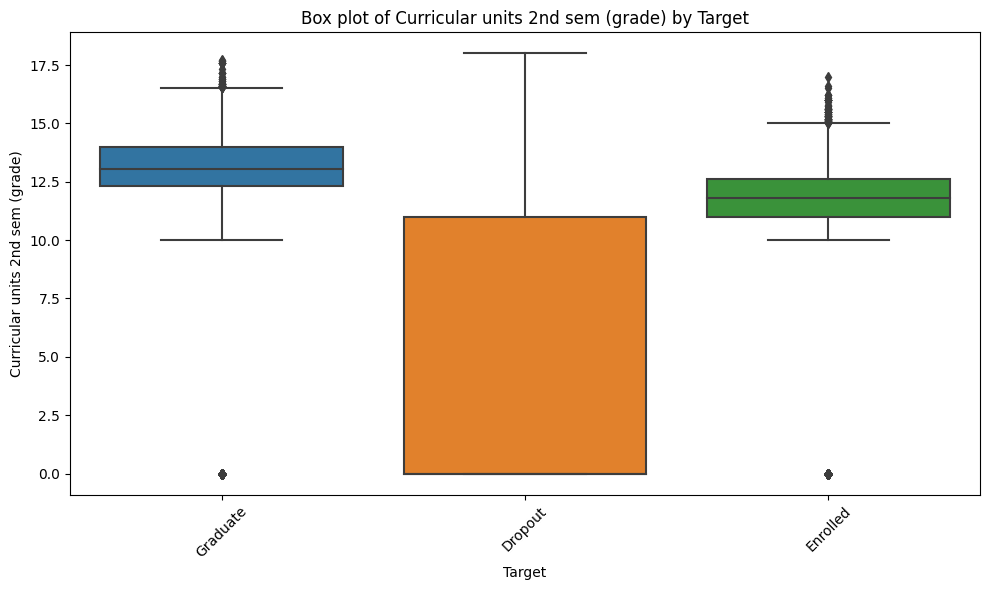

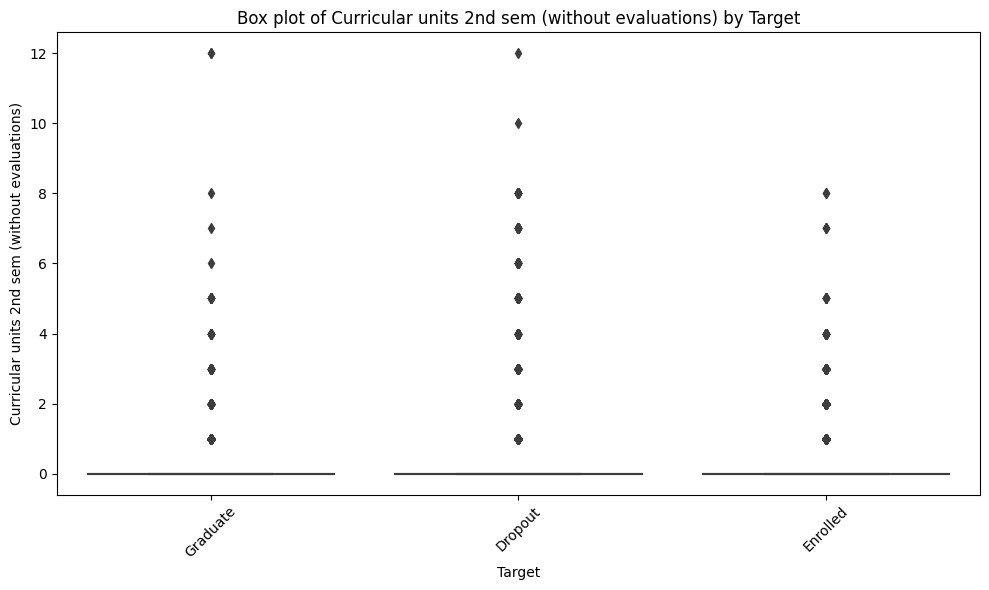

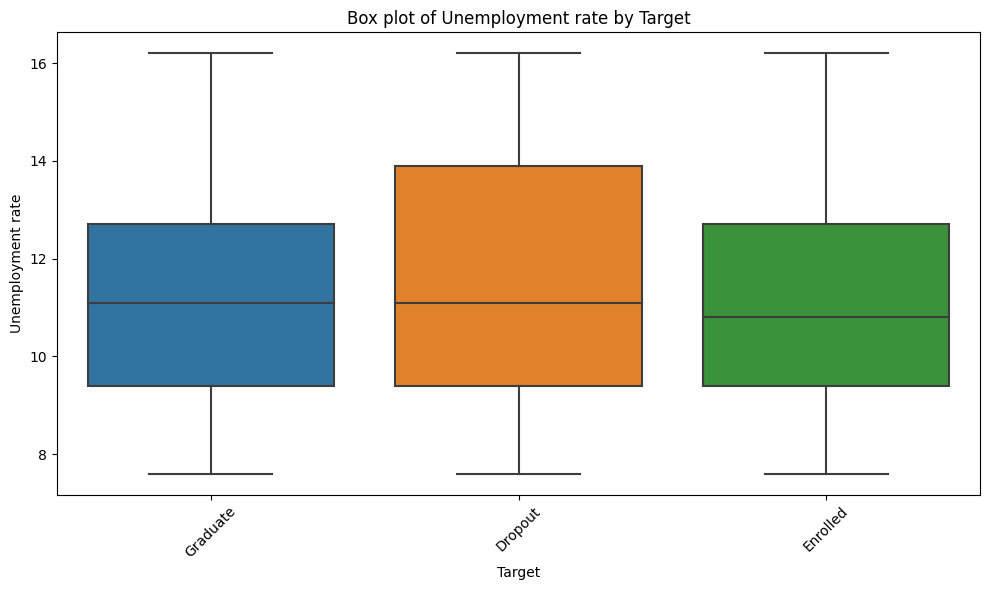

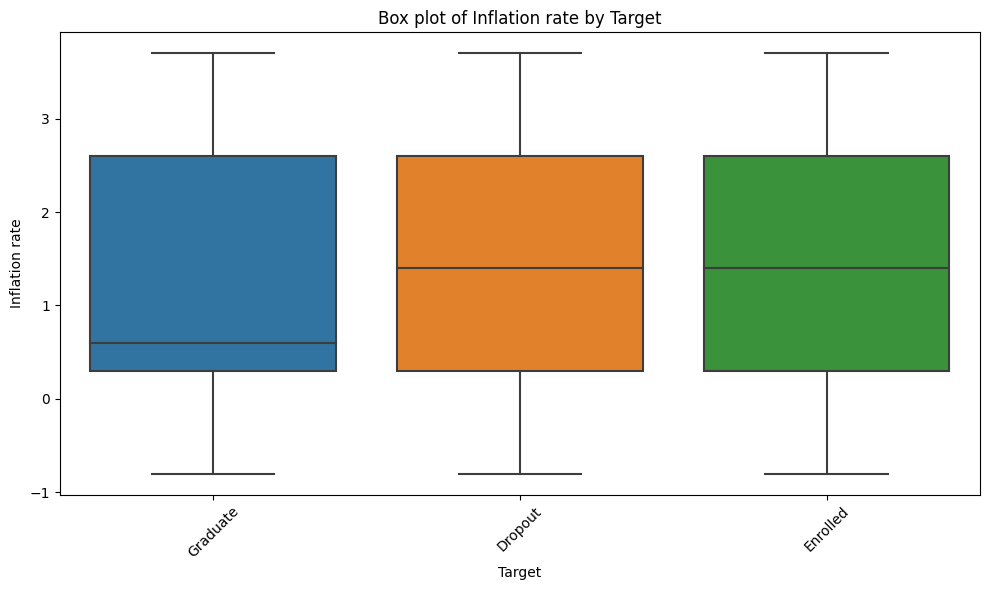

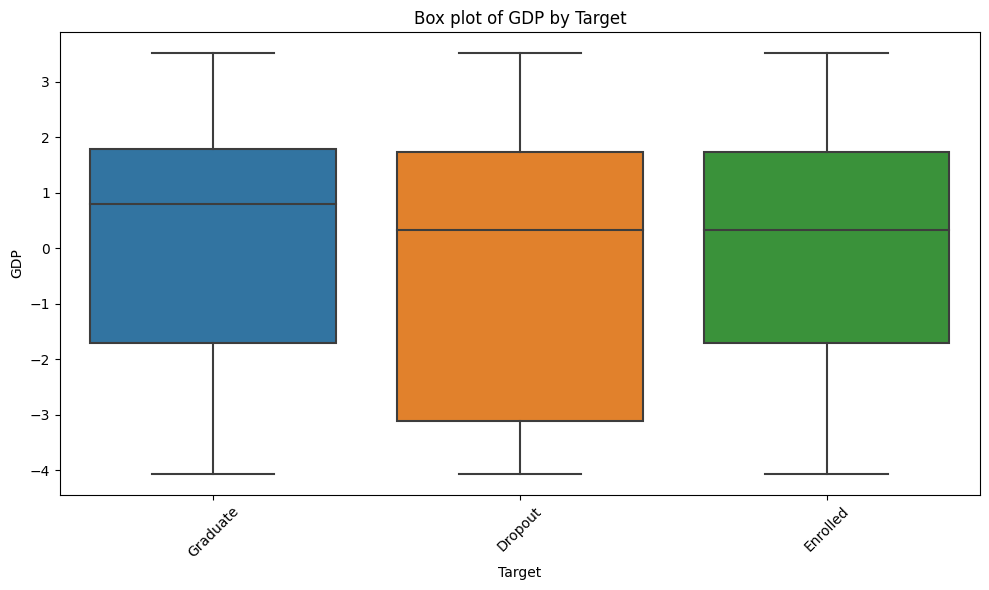

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming train_df is already loaded
train_df = pd.read_csv('/kaggle/input/playground-series-s4e6/train.csv')

# Define the target variable
target_variable = 'Target'  # Replace with your actual target variable column name

# Assuming your target variable has three categories: 'Graduate', 'Dropout', 'Enrolled'
target_categories = ['Graduate', 'Dropout', 'Enrolled']

# Assuming numerical_column is a numerical feature in train_df

# Iterate over each numerical column in train_df
for column in train_df.select_dtypes(include=['int', 'float']):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=target_variable, y=column, data=train_df)
    plt.title(f'Box plot of {column} by {target_variable}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [24]:
train_df['Target'] = train_df['Target'].replace(['Dropout', 'Enrolled', 'Graduate'], [0, 1, 2])
train_df['Target'].value_counts()

Target
2    36282
0    25296
1    14940
Name: count, dtype: int64

In [25]:
# Correlation
corrmat = train_df.corr()
print(corrmat[['Target']].sort_values(by = 'Target', ascending=False))

                                                  Target
Target                                          1.000000
Curricular units 2nd sem (approved)             0.781452
Curricular units 1st sem (approved)             0.725490
Curricular units 2nd sem (grade)                0.719036
Curricular units 1st sem (grade)                0.661355
Tuition fees up to date                         0.415691
Scholarship holder                              0.394124
Curricular units 2nd sem (enrolled)             0.289165
Curricular units 1st sem (enrolled)             0.263657
Curricular units 2nd sem (evaluations)          0.214951
Admission grade                                 0.172880
Course                                          0.154208
Curricular units 1st sem (evaluations)          0.152398
Displaced                                       0.150066
Previous qualification (grade)                  0.138119
Application order                               0.128394
Daytime/evening attendance     

In [33]:
# 6. RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state=2406)
model_rf.fit(X_train, y_train_encoded)
y_pred_rf = model_rf.predict(X_test)
score_rf = accuracy_score(y_pred_rf, y_test_encoded)
score_rf


0.8248170412963931

In [44]:
test_df.shape

(51012, 37)

In [45]:
test_df_copy = test_df.copy

In [46]:
# Drop the ID column if it's present
test_df = test_df.drop(columns=['id'], errors='ignore')

# Predict on the test data
test_pred = model_rf.predict(test_df)

# If you need the predicted class labels
print("Predicted classes:", test_pred)

Predicted classes: [0 2 2 ... 0 0 0]


In [50]:

test_df=pd.read_csv('/kaggle/input/playground-series-s4e6/test.csv')


In [51]:
submission = pd.DataFrame({'id': test_df.id, 'Target': test_pred})
print(submission.shape)
submission.head()

(51012, 2)


,id,Target
0,76518,0
1,76519,2
2,76520,2
3,76521,1
4,76522,1


In [52]:
# convert to category
submission['Target'] = submission['Target'].replace([0,1,2], ['Dropout', 'Enrolled', 'Graduate'])
submission.head()

,id,Target
0,76518,Dropout
1,76519,Graduate
2,76520,Graduate
3,76521,Enrolled
4,76522,Enrolled


In [53]:
submission.to_csv('submission.csv', index=False)